In [14]:
import sys
sys.path.append('..')
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from BERTopic_kmeans import BERTopic_kmeans

In [15]:
file = '../../data/bertopic_kmeans_44subcats_top10words.csv'
df = pd.read_csv(file)
start_shape = df.shape

In [16]:
m = BERTopic_kmeans(df)
subcats = df['subcategory'].unique()

In [17]:
i= 1
for subcat in subcats:
    print(subcat, i)
    m.calculate_similarity_score(subcat, topic_words=True)
    i += 1
df = m.df
df.head()

FLOOR CLEANERS 1


Time to process chunk 0-1000: 5.42 seconds
Time to process chunk 1000-2000: 0.68 seconds
Total processing time: 6.10 seconds
BATHROOM CLEANERS MILDEW CLEANERS 2
Time to process chunk 0-1000: 4.74 seconds
Time to process chunk 1000-2000: 3.77 seconds
Time to process chunk 2000-3000: 3.35 seconds
Total processing time: 11.87 seconds
ODOR CONTROLLING AIR FRESHENERS 3
Time to process chunk 0-1000: 4.12 seconds
Time to process chunk 1000-2000: 3.96 seconds
Time to process chunk 2000-3000: 4.85 seconds
Time to process chunk 3000-4000: 3.87 seconds
Time to process chunk 4000-5000: 3.60 seconds
Time to process chunk 5000-6000: 3.53 seconds
Time to process chunk 6000-7000: 3.82 seconds
Time to process chunk 7000-8000: 4.71 seconds
Time to process chunk 8000-9000: 4.29 seconds
Time to process chunk 9000-10000: 3.86 seconds
Total processing time: 40.63 seconds
TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS 4
Time to process chunk 0-1000: 4.21 seconds
Time to process chunk 1000-2000: 4.31 seconds
Ti

,subcategory,review_text,star_rating,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,bertopic_kmeans_words_similarity_score
0,FLOOR CLEANERS,the mop be cheap the wringing attachment doesn...,1.0,1.0,"mop, use, buy, floor, hand, time, wring, bad, ...","""Bad hand mop breaks easily and requires frequ...",0.541283,0.487172
1,BATHROOM CLEANERS MILDEW CLEANERS,this product be recommend for a front load was...,1.0,1.0,"mold, mildew, product, bleach, use, remove, st...","""Product harbors mold and mildew requiring ble...",0.360757,0.296763
2,ODOR CONTROLLING AIR FRESHENERS,i keep multiple bottle in the bathroom and car...,5.0,0.0,"smell, scent, love, product, spray, like, grea...","""Fresh odor, great scent, love and use""",0.238274,0.102440
3,FLOOR CLEANERS,i recently just get this mop love how easy it ...,5.0,0.0,"use, clean, floor, great, product, work, carpe...","""Effortless cleaning, great product for carpet...",0.303122,0.385834
4,TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS,convenient and easy to utilize,4.0,1.0,"like, product, use, work, good, easy, great, b...","""High quality product, easy to use and work we...",0.429906,0.259800


In [18]:
if df.shape == start_shape:
    df.to_csv(file, index=False)

In [33]:
by_rating_topic = df.groupby(['subcategory', 'star_rating', 'bertopic_kmeans_topic_number']).agg({'review_text':'count', 'bertopic_kmeans_similarity_score': 'mean', 'bertopic_kmeans_words_similarity_score': 'mean'}).reset_index()
by_rating_topic = by_rating_topic.rename(columns={'review_text':'count'})
by_rating_topic.head()

,subcategory,star_rating,bertopic_kmeans_topic_number,count,bertopic_kmeans_similarity_score,bertopic_kmeans_words_similarity_score
0,ABRASIVE CLEANERS,1.0,0.0,154,0.275901,0.270177
1,ABRASIVE CLEANERS,1.0,1.0,90,0.217566,0.318818
2,ABRASIVE CLEANERS,2.0,0.0,40,0.289965,0.211519
3,ABRASIVE CLEANERS,2.0,1.0,38,0.357474,0.301987
4,ABRASIVE CLEANERS,3.0,0.0,63,0.116998,0.242049


In [36]:
by_rating = by_rating_topic.groupby(['subcategory', 'star_rating']).agg({'count':'sum', 'bertopic_kmeans_similarity_score': 'mean', 'bertopic_kmeans_words_similarity_score': 'mean'}).reset_index()
by_rating.loc[:, 'score_diff'] = by_rating['bertopic_kmeans_similarity_score'] - by_rating['bertopic_kmeans_words_similarity_score']
by_rating.head()

,subcategory,star_rating,count,bertopic_kmeans_similarity_score,bertopic_kmeans_words_similarity_score,score_diff
0,ABRASIVE CLEANERS,1.0,244,0.246734,0.294498,-0.047764
1,ABRASIVE CLEANERS,2.0,78,0.323720,0.256753,0.066967
2,ABRASIVE CLEANERS,3.0,123,0.256354,0.278665,-0.022311
3,ABRASIVE CLEANERS,4.0,298,0.333549,0.315996,0.017553
4,ABRASIVE CLEANERS,5.0,3684,0.333508,0.319127,0.014381


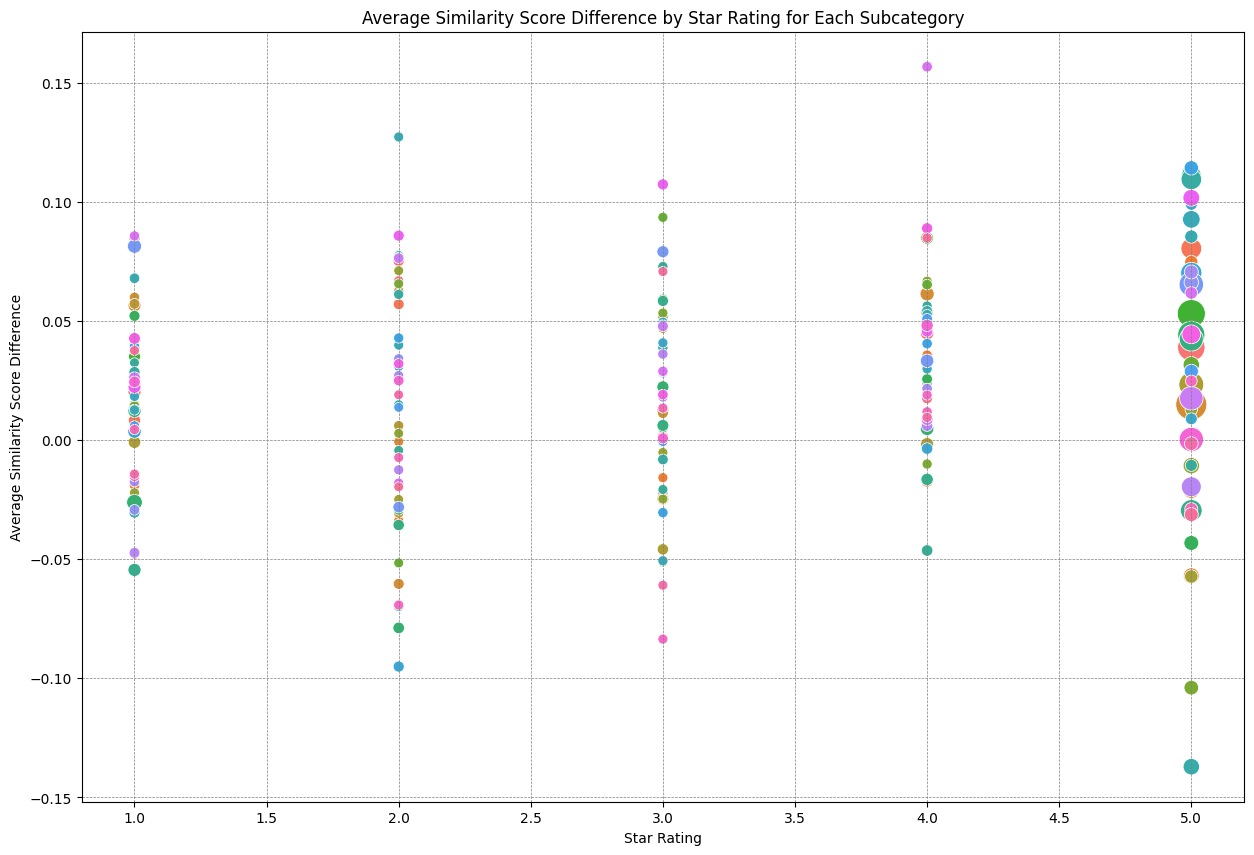

In [40]:
# plot the average similarity score by star rating for each subcategory using bubble plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=by_rating, x='star_rating', y='score_diff', hue='subcategory', size='count', sizes=(50, 500), ax=ax)
plt.title('Average Similarity Score Difference by Star Rating for Each Subcategory')  # score using topic labels - score using words
plt.xlabel('Star Rating')
plt.ylabel('Average Similarity Score Difference')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend().remove()